# Bandit Feedback

In this notebook we compare an agent that chooses the most popular product with an agent that chooses the highest ctr agent.



In [97]:
import gym, reco_gym
from copy import deepcopy
from reco_gym import env_1_args
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [6, 3]

ABTestNumberOfUsers=5000
NumberOfProducts=20
NumberOfSamples = 20
env_1_args['phi_var']=0.0
env_1_args['number_of_flips']=0
env_1_args['sigma_mu_organic'] = .5
env_1_args['sigma_omega']=0
env_1_args['random_seed'] = 42
env_1_args['num_products'] = NumberOfProducts
env_1_args['K'] = 5
env_1_args['number_of_flips'] = 8

env = gym.make('reco-gym-v1')
env.init_gym(env_1_args)

In [98]:
from agents import OrganicUserEventCounterAgent, organic_user_count_args
from reco_gym import Configuration

organic_counter_agent = OrganicUserEventCounterAgent(Configuration({
            **organic_user_count_args,
            **env_1_args,
            'select_randomly': True,
        }))

In [99]:
data = deepcopy(env).generate_logs(ABTestNumberOfUsers)


In [100]:
data[:NumberOfSamples]

,a,c,ps,ps-a,t,u,v,z
0,NaN,NaN,NaN,None,0,0,0.0,organic
1,3.0,0.0,0.05,"[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0...",1,0,NaN,bandit
2,1.0,0.0,0.05,"[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0...",2,0,NaN,bandit
3,1.0,0.0,0.05,"[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0...",3,0,NaN,bandit
4,11.0,0.0,0.05,"[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0...",4,0,NaN,bandit
5,NaN,NaN,NaN,None,5,0,16.0,organic
6,NaN,NaN,NaN,None,6,0,14.0,organic
7,NaN,NaN,NaN,None,7,0,13.0,organic
8,2.0,0.0,0.05,"[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0...",8,0,NaN,bandit
9,7.0,0.0,0.05,"[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0...",9,0,NaN,bandit


Here is the data the following columns are present:
* **`t`**—_`Time`_. Currently, _`Time`_ reflects the order of _`Events`_ but it does **not** represent the notion of the time in a physical sense.
* **`u`**—_`User`_.
* **`z`**—_`Event Type`_. There are two types of _`Events`_: _Organic_ and _Bandit_.
* **`v`**—_`View`_. The column shows which _`Product`_ was shown to a _`User`_ in an _Organic_ _`Event`_.
* **`a`**—_`Action`_. Currently, _`Action`_ is a _`Product`_ that was provided to a _`User`_ during a _Bandit_ _`Event`_.
* **`c`**—_`Click`_. This is a _Reward_ for an _`Action`_ provided by the _`Agent`_.
* **`ps`**—Probability of selecting a particular _`Action`_.

**Note #1:** _`Time`_, _`User`_, _`Views`_, and _`Actions`_ **all** them start with _`0`_.

**Note #2:** For any _`User`_, _Organic_ _`Event`_ _**always**_ precedes a _Bandit_ _`Event`_.

## Data Analysis
Let's analyse these histograms:
* _Actions per Product_
* _Clicks per Product_
* _Views per Product_.

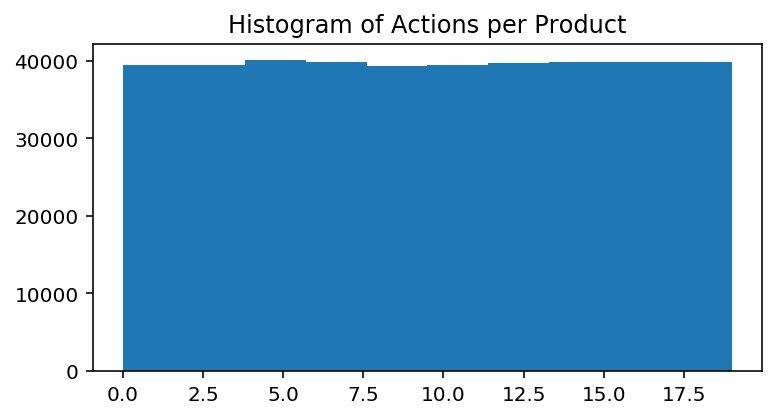

In [101]:
_, ax = plt.subplots()
ax.set_title('Histogram of Actions per Product')

ax.hist(data[data['z'] == 'bandit']['a'])
plt.show()

It is evident that all _`Actions`_ are _*evenly*_ distributed.
That is an expected behaviour because *all* _`Actions`_ are randomly applied for all _Bandit_ _`Events`_.  This is not typical behaviour (usually actions are personalised not random) and we will relax this assumption later in the course.

Clicks:  [225.0, 242.0, 184.0, 207.0, 194.0, 202.0, 184.0, 213.0, 186.0, 173.0, 184.0, 170.0, 213.0, 199.0, 213.0, 204.0, 186.0, 179.0, 213.0, 207.0]


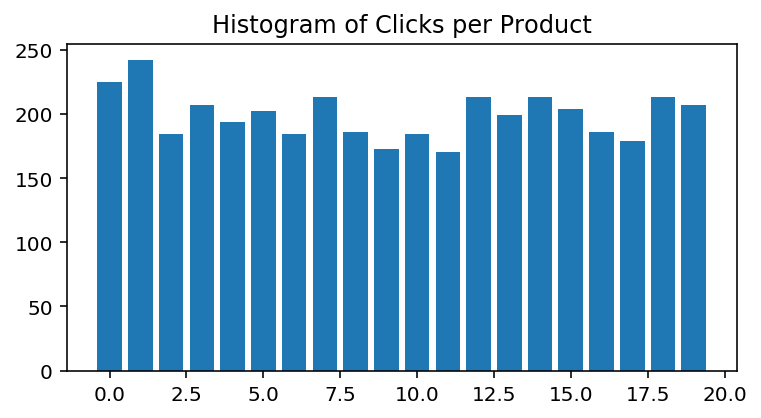

In [102]:
clicks = []
bandits = data[data['z'] == 'bandit']
for product_id in range(NumberOfProducts):
    actions = bandits[bandits['a'] == product_id]
    clicks.append(np.sum(actions[actions['c'] == 1]['c']))
    
print("Clicks: ", clicks)

_, ax = plt.subplots()
ax.set_title('Histogram of Clicks per Product')

ax.bar(range(NumberOfProducts), clicks)
plt.show()

We can estimate a click through rate for each recommendation by dividing the number of times we obtained a click by the number of impressions.  This produces the following "bandit best of":

CTR:  [0.01135962 0.01228052 0.00935435 0.01046406 0.0096816  0.01005676
 0.00927092 0.01065799 0.00943588 0.00879825 0.00930703 0.00860019
 0.01071321 0.01003783 0.01073048 0.01022403 0.00939062 0.00893035
 0.01072076 0.01037802]


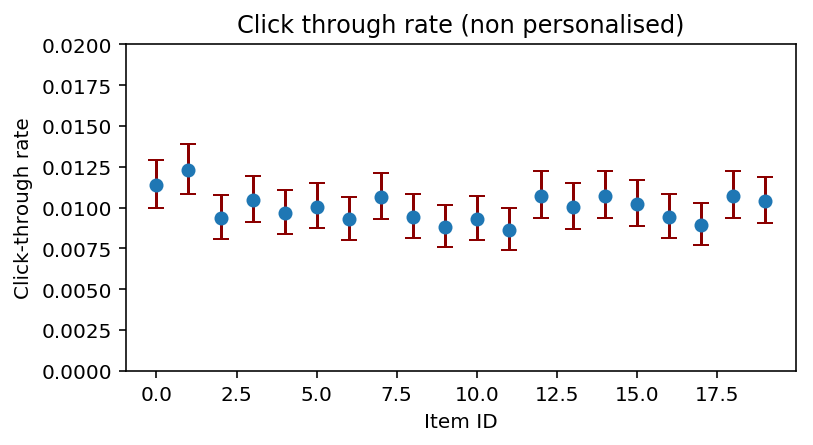

In [103]:
from scipy.stats.distributions import beta

clicks = []
impressions = []
lower_errors = []
upper_errors = []
bandits = data[data['z'] == 'bandit']
for product_id in range(NumberOfProducts):
    actions = bandits[bandits['a'] == product_id]
    clicks.append(np.sum(actions[actions['c'] == 1]['c']))
    impressions.append(sum(actions['a']==product_id))

    # Compute expected value according to a beta distribution
    expected_value = beta.ppf(0.500, clicks[-1] + 1, impressions[-1] - clicks[-1] + 1)
    # Compute a confidence interval
    lower_bound = beta.ppf(0.025, clicks[-1] + 1, impressions[-1] - clicks[-1] + 1)
    upper_bound = beta.ppf(0.975, clicks[-1] + 1, impressions[-1] - clicks[-1] + 1)
    # Save difference as error
    lower_errors.append(expected_value - lower_bound)
    upper_errors.append(upper_bound - expected_value)
    
print("CTR: ", np.array(clicks)/np.array(impressions))

_, ax = plt.subplots()
ax.set_title('Click through rate (non personalised)')

ax.errorbar(range(NumberOfProducts),
            np.array(clicks)/np.array(impressions),
            yerr = (lower_errors, upper_errors),
            fmt = 'o',
            ecolor = 'darkred',
            capsize = 4)

plt.ylim([0,0.02])
plt.xlabel('Item ID')
plt.ylabel('Click-through rate')
plt.savefig('CTR_organiccounter.eps')
plt.show()

The non-personalised click through rate can be uses as a non-personalised agent.

In [104]:
from collections import defaultdict

from agents.abstract import Agent

class GreedySingleActionAgent(Agent):
    def __init__(self, preferred_action, config = Configuration({'num_products': 10})):
        super(GreedySingleActionAgent, self).__init__(config)
        self.preferred_action = preferred_action
        
    def act(self, observation, reward, done):
        prob = np.zeros(self.config.num_products)
        prob[self.preferred_action] = 1.
        return {
            **super().act(observation, reward, done),
            **{
                'a': self.preferred_action,
                'ps': prob[self.preferred_action],
                'ps-a': prob,
            },
        }

In [105]:
# Initialise bandit
top_ctr_item = np.argmax(np.array(clicks)/np.array(impressions))
print('The Greedy-Bandit agent will always take action {0}'.format(top_ctr_item))
greedy_bandit = GreedySingleActionAgent(top_ctr_item, Configuration(env_1_args))

The Greedy-Bandit agent will always take action 1


The ads that in a non-personalised sense attracts the most clicks is not in general the same as a product that is often viewed organically, to see this we can plot the organic views:

Views:  [2561, 3111, 5864, 2741, 4618, 3763, 13498, 9936, 2512, 4664, 2064, 6104, 4365, 11814, 12748, 4098, 2961, 1266, 3368, 4871]


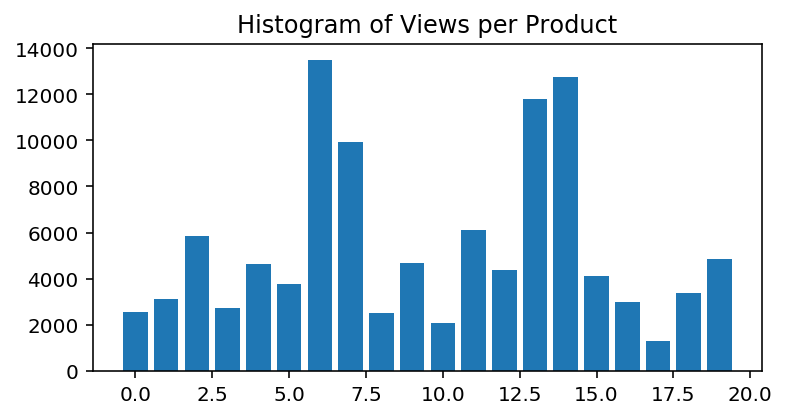

In [106]:
organics = data[data['z'] == 'organic']

views = []
for product_id in range(NumberOfProducts):
    views.append(organics[organics['v'] == product_id].shape[0])

print("Views: ", views)

_, ax = plt.subplots()
ax.set_title('Histogram of Views per Product')

ax.bar(range(NumberOfProducts), views)
plt.show()

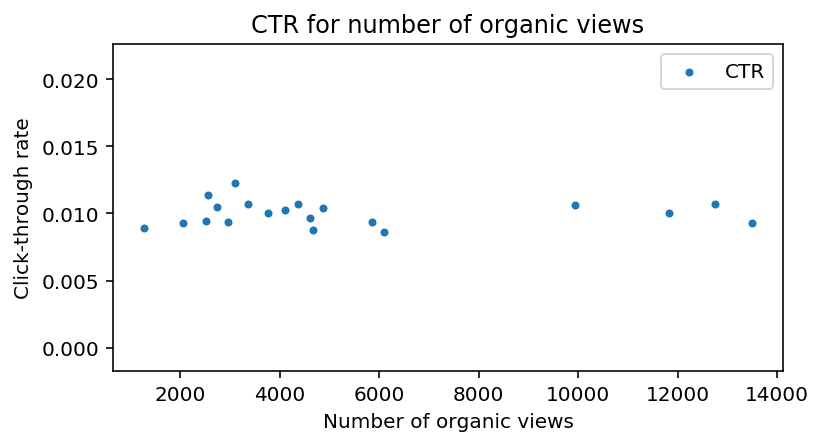

In [107]:
# Plot number of organic views on x-axis and CTR on y-axis
CTR = np.array(clicks)/np.array(impressions)


_, ax = plt.subplots()
ax.set_title('CTR for number of organic views')

ax.scatter(views, CTR, marker = '.', label = 'CTR')

plt.xlabel('Number of organic views')
plt.ylabel('Click-through rate')
plt.legend()
plt.show()

While there may be a relationship between popular products and high click through rate it is certainly not guaranteed.  This fact underlies the need to use bandit feedback.  Here we will develop our final organic agent as an organic best of to latter hammer home this point.

In [108]:
# Initialise bandit
top_viewed_item = np.argmax(views)
print('The organic-best-of agent will always take action {0}'.format(top_viewed_item))
greedy_organic = GreedySingleActionAgent(top_viewed_item, Configuration(env_1_args))

The organic-best-of agent will always take action 6


In [109]:
from datetime import datetime
from reco_gym.evaluate_agent import verify_agents, plot_verify_agents

print('Starting A/B-testing at {0}'.format(datetime.now()))
result = verify_agents(env,
                       5000,
                       {'Greedy-Bandit': greedy_bandit,
                        'Greedy-Organic': greedy_organic})
print('Finished A/B-testing at {0}'.format(datetime.now()))

Starting A/B-testing at 2019-06-14 15:11:23.360587
Finished A/B-testing at 2019-06-14 15:12:45.835321


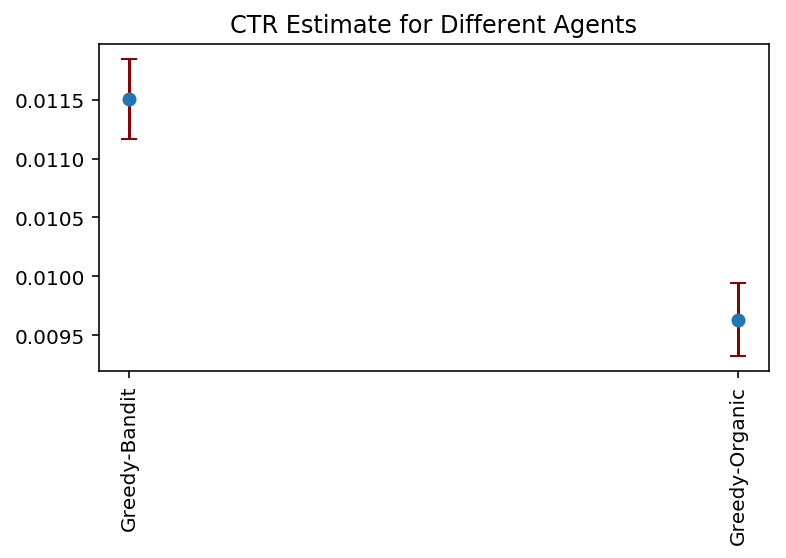

In [110]:
fig = plot_verify_agents(result)
plt.savefig('CTR_estimate_banditVSorganic_5K', dpi = 600, bbox_inches = 'tight')
plt.show()